In [1]:
from io import StringIO
import itertools

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
runs = 100
impls = {
    'naive': [ 32, 64, 128, 256, 512 ],
    'openmp': [ 32, 64, 128, 256, 512, 1024 ],
    'blas': [ 32, 64, 128, 256, 512, 1024, 2048, 4096 ],
    'naive-cuda': [ 32, 64, 128, 256, 512, 1024, 2048, 4096 ],
    'tiled-cuda': ([ 32, 64, 128, 256, 512, 1024, 2048, 4096 ], [2, 4, 8, 16, 32]),
}

outputs = []
for (impl, sizes) in impls.items():
    if impl == 'tiled-cuda':
        for size in sizes[0]:
            for tile_size in sizes[1]:           
                print((impl, size, tile_size))
                output = !./{impl} {size} {runs} {tile_size}
                output = '\n'.join(output)
                outputs.append(output)
    else:
        for size in sizes:
            print((impl, size))
            output = !./{impl} {size} {runs}
            output = '\n'.join(output)
            outputs.append(output)

('naive', 32)
('naive', 64)
('naive', 128)
('naive', 256)
('naive', 512)
('openmp', 32)
('openmp', 64)
('openmp', 128)
('openmp', 256)
('openmp', 512)
('openmp', 1024)
('blas', 32)
('blas', 64)
('blas', 128)
('blas', 256)
('blas', 512)
('blas', 1024)
('blas', 2048)
('blas', 4096)
('naive-cuda', 32)
('naive-cuda', 64)
('naive-cuda', 128)
('naive-cuda', 256)
('naive-cuda', 512)
('naive-cuda', 1024)
('naive-cuda', 2048)
('naive-cuda', 4096)
('tiled-cuda', 32, 2)
('tiled-cuda', 32, 4)
('tiled-cuda', 32, 8)
('tiled-cuda', 32, 16)
('tiled-cuda', 32, 32)
('tiled-cuda', 64, 2)
('tiled-cuda', 64, 4)
('tiled-cuda', 64, 8)
('tiled-cuda', 64, 16)
('tiled-cuda', 64, 32)
('tiled-cuda', 128, 2)
('tiled-cuda', 128, 4)
('tiled-cuda', 128, 8)
('tiled-cuda', 128, 16)
('tiled-cuda', 128, 32)
('tiled-cuda', 256, 2)
('tiled-cuda', 256, 4)
('tiled-cuda', 256, 8)
('tiled-cuda', 256, 16)
('tiled-cuda', 256, 32)
('tiled-cuda', 512, 2)
('tiled-cuda', 512, 4)
('tiled-cuda', 512, 8)
('tiled-cuda', 512, 16)
('tiled

In [3]:
df = pd.concat([ pd.read_csv(StringIO(output)) for output in outputs ])
df.to_csv('results.csv')

In [4]:
def create_plot(df):
    # Set the style for better-looking plots
    plt.style.use('seaborn-v0_8')
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Group the data by method and size, and calculate the mean runtime
    grouped_data = df.groupby(['method', 'size'])['runtime_us'].mean().reset_index()
    
    # Create a line plot for each method
    for method in grouped_data['method'].unique():
        method_data = grouped_data[grouped_data['method'] == method]
        plt.plot(method_data['size'], method_data['runtime_us'], marker='o', label=method)
    
    # Set the scales to logarithmic
    plt.xscale('log', base=2)
    plt.yscale('log')
    
    # Set labels and title
    plt.xlabel('Matrix Size')
    plt.ylabel('Runtime (μs)')
    plt.title('Comparison of Matrix Multiplication Methods')
    
    # Add a legend
    plt.legend()
    
    # Add a grid for better readability
    plt.grid(True, which="both", ls="-", alpha=0.2)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

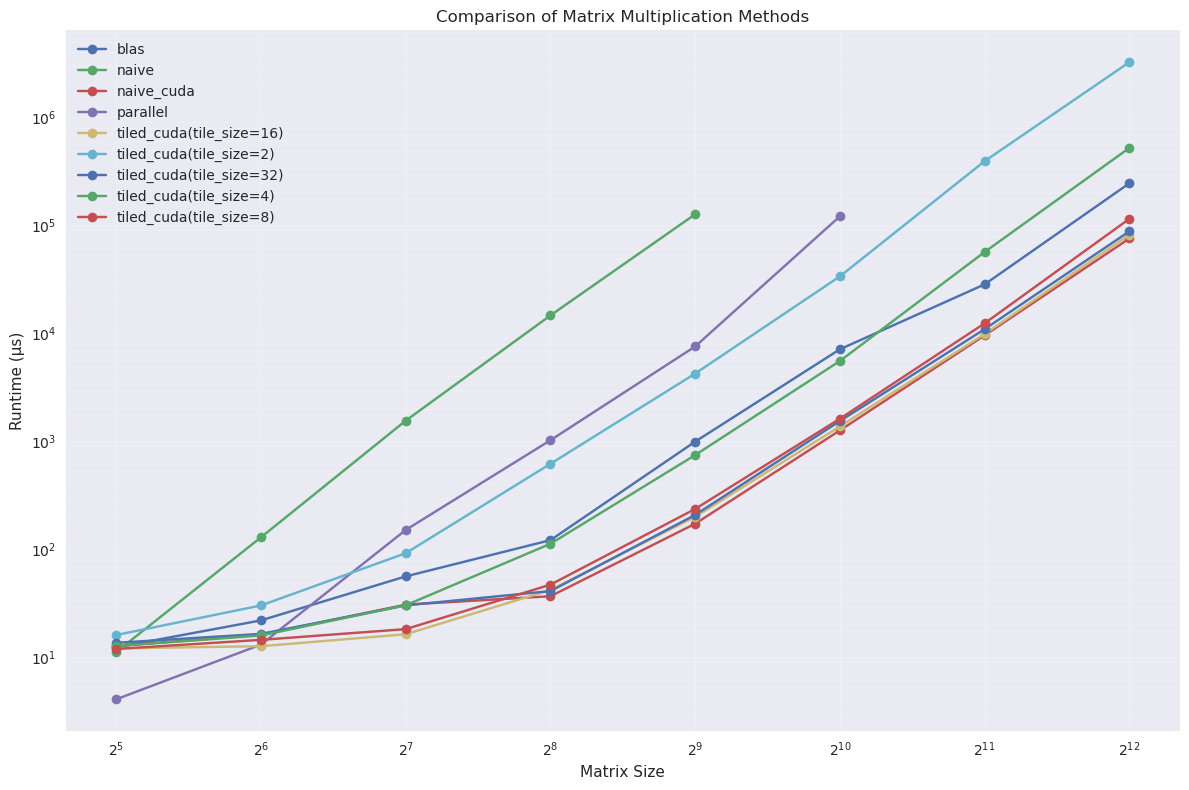

In [5]:
create_plot(df)

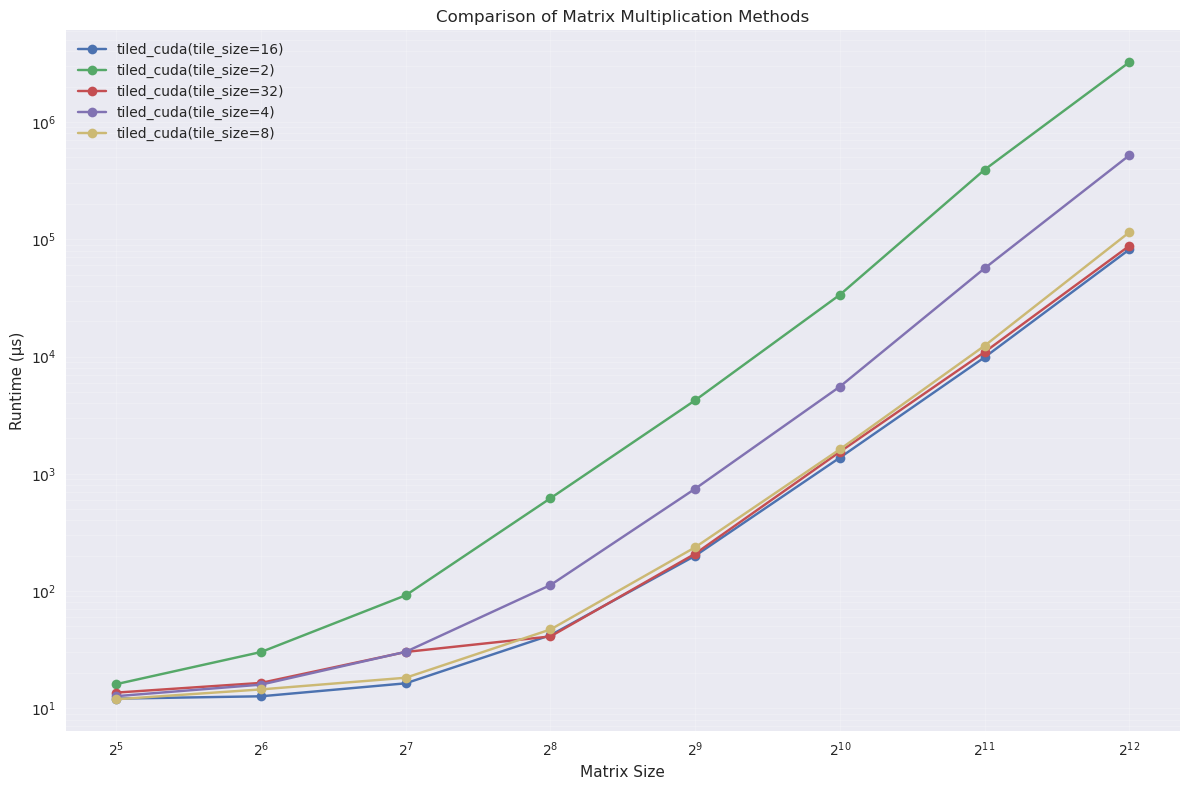

In [6]:
create_plot(df[df['method'].str.contains('tiled_cuda')])